In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display

%matplotlib inline

# Interactive Loan Calculator

This is a simple demonstration of using ipywidgets [more info here..](https://ipywidgets.readthedocs.io/en/latest/) to create an interactive loan calculator. It uses the standard fixed rate monthly payment formula which is:
$$c=\frac{rP}{1-(1+r)^{-N}}$$

P = the amount borrowed or **Principal**

r = the monthly interest rate

N = the number of monthly payments

Some example interest rates and calculations to try:

* Credit card: $3000 at 13.24% - 23.24% for 1 year

* Car loan: $30,000 at 8.54% for 5 years 

* Home loan: $500,000 at 3.625% - 4.00% for 30 years

"Compound interest is the eighth wonder of the world. He who understands it, earns it ... he who doesn't ... pays it" *Albert Einstein*



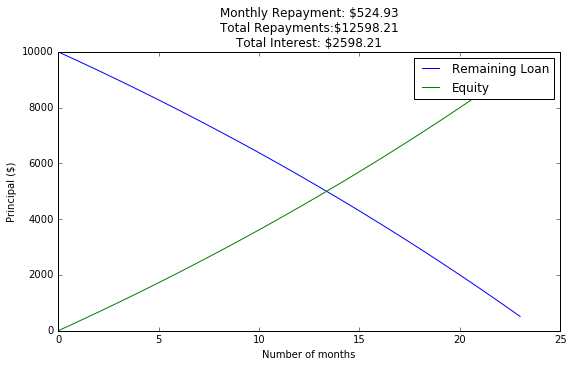

In [6]:
# Calculate the balance remaining
def balance(x,P,r,N):
    return P*(1-(1+r)**(x-N))/(1-(1+r)**-N)
balance = np.vectorize(balance) # Vectorize so works on array

# This function is called every time the controls are changed
@interact(Principal = "200000", interest="6.5", years=(1,59))
def mortage_calc(Principal,interest,years):
    P = float(Principal) # Convert string to float
    N = years*12 # Number of months
    r = (float(interest)/12)*.01 # Convert interest rate to monthly rate
    c = (r*P)/(1-(1+r)**-N) # Monthly repayment calculation
    x = np.arange(0,N) # Create array from 0 to number of periods
    remaining = balance(x,P,r,N) # Calculate the remaining mortage for each time period
    
    # Plotting happens here
    plt.figure(figsize=(9,5))
    plt.title("Monthly Repayment: $"+str(round(c,2))  # Display repayment info in title
              +"\nTotal Repayments:$"+str(round(c*N,2))
              +"\nTotal Interest: $"+str(round(c*N-P,2)))
    plt.xlabel("Number of months")
    plt.ylabel("Principal ($)")
    plt.plot(x,remaining,label="Remaining Loan")
    plt.plot(x,P-remaining,label="Equity")
    plt.legend()
    plt.show()
